# Budget Analysis

---

## Environment Setup

In [53]:
# Initial Imports

import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv

%matplotlib inline


In [54]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))
    

In [55]:
# Set environment variables from the .env file

load_dotenv("/Users/heenaroy/Desktop/.env")


True

In [56]:
# Extract API keys from environment variables

PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SECRET = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")


---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [57]:
# Create the client object

client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SECRET, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [58]:
# Set the institution id

INSTITUTION_ID = "ins_109508"


### 2. Generate a public token

In [62]:
# Create the public token

create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the public token

print(create_tkn_response)


{'public_token': 'public-sandbox-9ca53d13-e25a-4974-bfbf-b7ef14853d59', 'request_id': 'a9tsIYGeSnfeBNX'}


### 3. Exchange the public token for an access token

In [63]:
# Retrieve the access token

exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access token

print(exchange_response)


{'access_token': 'access-sandbox-57837fcb-5cff-4841-be6a-cb8c979bd65d', 'item_id': 'mxLzD5m6yvFj7GxbQ158uJBAREKe58tLX6n4J', 'request_id': 'chx4aZiB0f6TGHJ'}


In [64]:
# Store the access token in a Python variable

access_token = exchange_response['access_token']


### 4. Fetch Accounts

In [65]:
# Retrieve accounts

accounts_response=client.Accounts.get(access_token)

# Print accounts

pretty_print_response(accounts_response)


{
    "accounts": [
        {
            "account_id": "VJ1eLWdz4BFZB1pnK3NbfN1DXpao5MC67XLjv",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "wZA7lKd6EvC3z9MQWn6KUoBwKkN7dnsgexD4y",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

In [66]:
# Define an empty DataFrame

accounts_category = pd.DataFrame()

acct_type = []
acct_bal = []

# Retrieve all the transactions

for account in accounts_response["accounts"]:
    acct_type.append(account["type"])
    acct_bal.append(account["balances"]["current"])

# Populate the transactions DataFrame with the transactions data

accounts_category["Type"] = acct_type
accounts_category["Balance"] = acct_bal


# Display data from the DataFrame    

accounts_category = round(accounts_category.groupby("Type").sum(),2)
accounts_category


,Balance
Type,
credit,410.00
depository,44520.00
investment,23952.74
loan,121564.06


---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [67]:
# Set the start and end date 90 days from today

start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())


# Retrieve the transactions for the last 90 days

transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print the transactions

pretty_print_response(transaction_response)


{
    "accounts": [
        {
            "account_id": "VJ1eLWdz4BFZB1pnK3NbfN1DXpao5MC67XLjv",
            "balances": {
                "available": 100,
                "current": 110,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "0000",
            "name": "Plaid Checking",
            "official_name": "Plaid Gold Standard 0% Interest Checking",
            "subtype": "checking",
            "type": "depository"
        },
        {
            "account_id": "wZA7lKd6EvC3z9MQWn6KUoBwKkN7dnsgexD4y",
            "balances": {
                "available": 200,
                "current": 210,
                "iso_currency_code": "USD",
                "limit": null,
                "unofficial_currency_code": null
            },
            "mask": "1111",
            "name": "Plaid Saving",
            "official_name": "Plaid Silver Standard 0.1% Interest Saving",
       

### 2. Print the categories for each transaction

In [68]:
# Create a for-loop to print the categories for each transaction

for transactions in transaction_response["transactions"]:
    pretty_print_response(transactions["category"][0])
    

"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"
"Food and Drink"
"Payment"
"Food and Drink"
"Shops"
"Payment"
"Travel"
"Transfer"
"Transfer"
"Recreation"
"Travel"
"Food and Drink"
"Food and Drink"
"Food and Drink"
"Transfer"
"Travel"
"Travel"


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [69]:
# Define an empty DataFrame and set the columns as date, name, amount, and category

spend_category = pd.DataFrame()

date = []
name = []
amount = []
category = []

# Retrieve all the transactions

for transactions in transaction_response["transactions"]:
    date.append(transactions["date"])
    name.append(transactions["name"])
    amount.append(transactions["amount"])
    category.append(transactions["category"][0])

# Populate the transactions DataFrame with the transactions data

spend_category["Date"] = date
spend_category["Name"] = name
spend_category["Amount"] = amount
spend_category["Category"] = category

# Display sample data from the DataFrame    

spend_category.head()


,Date,Name,Amount,Category
0,2020-05-25,Tectra Inc,500.0,Food and Drink
1,2020-05-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2,2020-05-24,KFC,500.0,Food and Drink
3,2020-05-24,Madison Bicycle Shop,500.0,Shops
4,2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [70]:
# Display data types

spend_category.dtypes


Date         object
Name         object
Amount      float64
Category     object
dtype: object

In [71]:
# Make any required data type transformation

spend_category["Date"] = spend_category["Date"].astype("datetime64")

spend_category.dtypes


Date        datetime64[ns]
Name                object
Amount             float64
Category            object
dtype: object

In [72]:
# Set the date column as index

spend_category.set_index(spend_category["Date"], inplace=True)
spend_category.drop(columns=["Date"], inplace=True)

# Display sample data

spend_category.head()


,Name,Amount,Category
Date,,,
2020-05-25,Tectra Inc,500.0,Food and Drink
2020-05-24,AUTOMATIC PAYMENT - THANK,2078.5,Payment
2020-05-24,KFC,500.0,Food and Drink
2020-05-24,Madison Bicycle Shop,500.0,Shops
2020-05-15,CREDIT CARD 3333 PAYMENT *//,25.0,Payment


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [74]:
# Fetch de income data

income_response = client.Income.get(access_token)

# Print the income data

pretty_print_response(income_response)


{
    "income": {
        "income_streams": [
            {
                "confidence": 0.99,
                "days": 690,
                "monthly_income": 500,
                "name": "UNITED AIRLINES"
            }
        ],
        "last_year_income": 6000,
        "last_year_income_before_tax": 7285,
        "max_number_of_overlapping_income_streams": 1,
        "number_of_income_streams": 1,
        "projected_yearly_income": 6085,
        "projected_yearly_income_before_tax": 7389
    },
    "request_id": "8rghyuGPlKEvD8S"
}


In [76]:
# Determine the previous year's gross income and print the results

last_year_gross = income_response["income"]["last_year_income_before_tax"]

print("")
print(f"Last Year's Income Before Tax: ${last_year_gross}")
print("")



Last Year's Income Before Tax: $7285



In [77]:
# Determine the current monthly income and print the results

monthly_inc = income_response["income"]["income_streams"][0]["monthly_income"]

print("")
print(f"Current Monthly income: ${monthly_inc}")
print("")



Current Monthly income: $500



In [78]:
# Determine the projected yearly income and print the results

proj_year_gross = income_response["income"]["projected_yearly_income_before_tax"]

print("")
print(f"Projected Yearly Income Before Tax: ${proj_year_gross}")
print("")



Projected Yearly Income Before Tax: $7389



---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [79]:
# Compute the total expenses per category

expenses = spend_category.groupby("Category").sum()

# Display the expenses per catefory

expenses


,Amount
Category,
Food and Drink,3317.19
Payment,6310.50
Recreation,235.50
Shops,1500.00
Transfer,20537.34
Travel,35.19


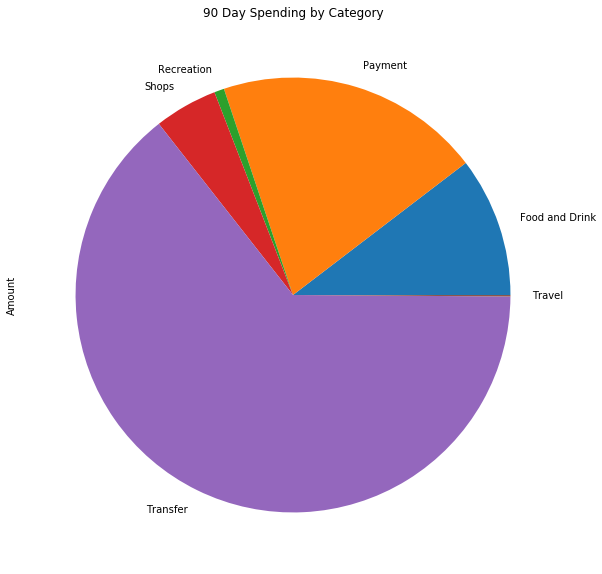

In [80]:
# Create a spending categories pie chart.

expenses.plot(kind="pie", y="Amount", figsize=(10, 10), legend=False, title="90 Day Spending by Category")


### Calculate the expenses per month

In [81]:
# Create a DataFrame with the total expenses

spend_category.reset_index(inplace=True)
spend_category["Month"]=pd.DatetimeIndex(spend_category["Date"]).month

monthly_expense = spend_category.groupby("Month").sum()

# Display sample data

monthly_expense


,Amount
Month,
2,6.33
3,11145.24
4,10645.24
5,10138.91


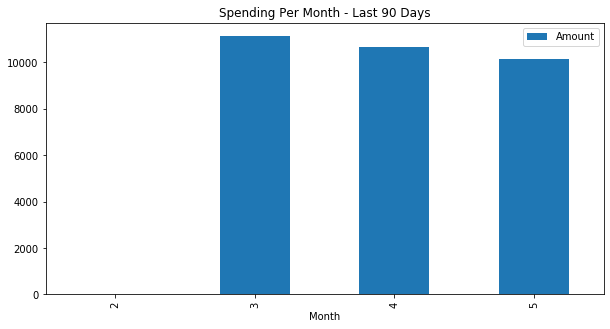

In [82]:
# Create a spending per month bar chart

monthly_expense.plot(kind="bar", figsize=(10,5), title=("Spending Per Month - Last 90 Days"))
